In [1]:
import pandas as pd
import numpy as np
from sympy import Matrix
from Functions import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis

In [2]:
df=pd.read_excel('../data/dfa_analysis_data.xlsx',sheet_name='factors')

In [3]:
print('Entire Dataframe')
calculate_statistics(df)

Entire Dataframe


,Mkt-RF,SMB,HML,RF
mean,0.081421,0.022779,0.041191,0.032029
volatility,0.185061,0.109755,0.123727,0.008690
sharpe,0.439968,0.207548,0.332923,3.685628
skewness,0.156081,1.828788,2.061797,1.128981
kurtosis,7.413301,18.574483,18.035914,1.429388
VaR,-0.080220,-0.042060,-0.042100,0.000000
CVaR,-0.120227,-0.058493,-0.068088,-0.000167


In [4]:
print('Beginning to 1980')
calculate_statistics(df[df['Date']<'1981'])

Beginning to 1980


,Mkt-RF,SMB,HML,RF
mean,0.081138,0.033985,0.049479,0.027730
volatility,0.204893,0.114481,0.133723,0.007665
sharpe,0.395999,0.296865,0.370010,3.617577
skewness,0.431109,2.530832,2.827947,1.273164
kurtosis,8.021284,24.043758,22.444686,2.042108
VaR,-0.083985,-0.043400,-0.042910,0.000000
CVaR,-0.134000,-0.059181,-0.067955,-0.000167


In [5]:
print('1981 to 2001')
calculate_statistics(df[(df['Date']>='1981') & (df['Date']<'2002')])

1981 to 2001


,Mkt-RF,SMB,HML,RF
mean,0.077257,-0.000862,0.063776,0.063076
volatility,0.157083,0.118111,0.110963,0.007738
sharpe,0.491824,-0.007297,0.574754,8.151451
skewness,-0.777232,0.727953,0.320124,1.276975
kurtosis,2.911579,8.111252,1.326049,1.835111
VaR,-0.064545,-0.046515,-0.041790,0.002455
CVaR,-0.101262,-0.069562,-0.060415,0.002162


In [6]:
print('2002 to end')
calculate_statistics(df[df['Date']>='2002'])

2002 to end


,Mkt-RF,SMB,HML,RF
mean,0.086187,0.017486,-0.001710,0.012676
volatility,0.155013,0.086276,0.107309,0.004451
sharpe,0.555998,0.202672,-0.015932,2.847797
skewness,-0.528778,0.173811,-0.052010,1.200987
kurtosis,1.134013,-0.272572,3.018553,0.333135
VaR,-0.079130,-0.038230,-0.041740,0.000000
CVaR,-0.099992,-0.045869,-0.072038,NaN


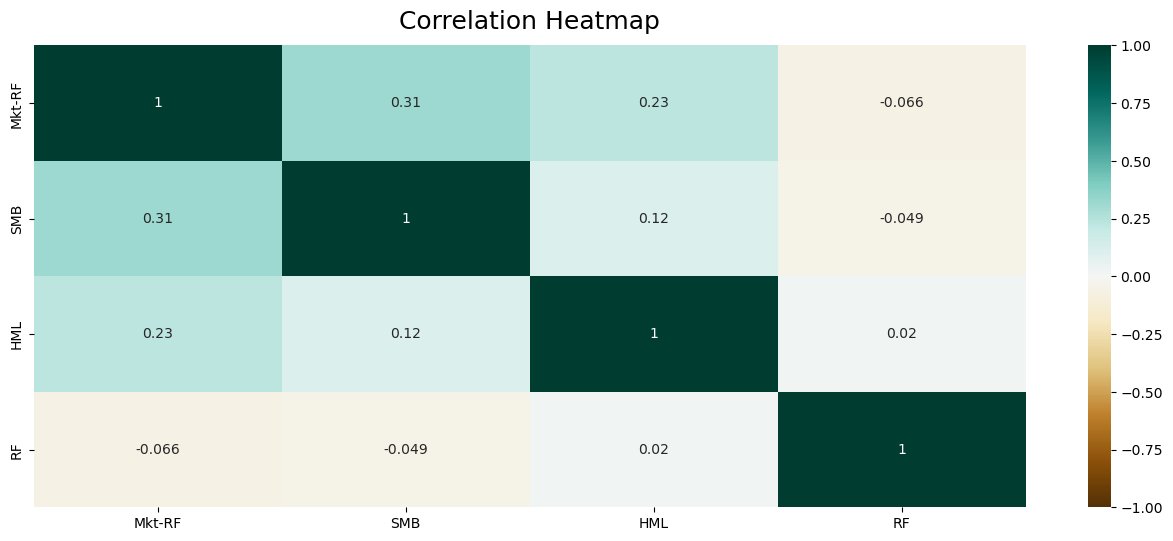

In [7]:
correlation_heatmap(df)

Beginning to 1980


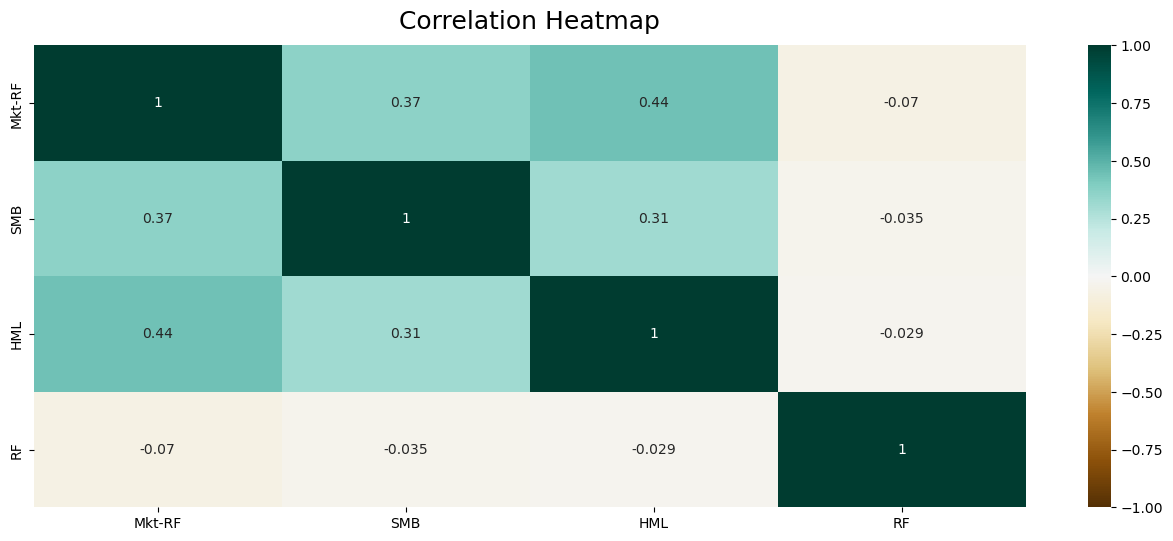

In [8]:
print('Beginning to 1980')
correlation_heatmap(df[df['Date']<'1981'])

1981 to 2001


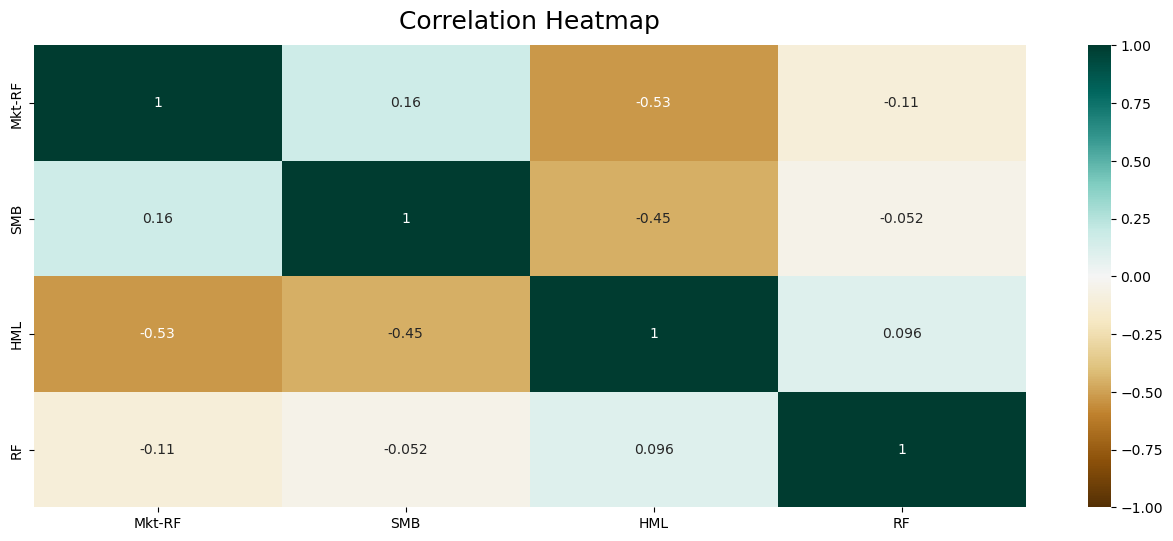

In [9]:
print('1981 to 2001')
correlation_heatmap(df[(df['Date']>='1981') & (df['Date']<'2002')])

2002 to end


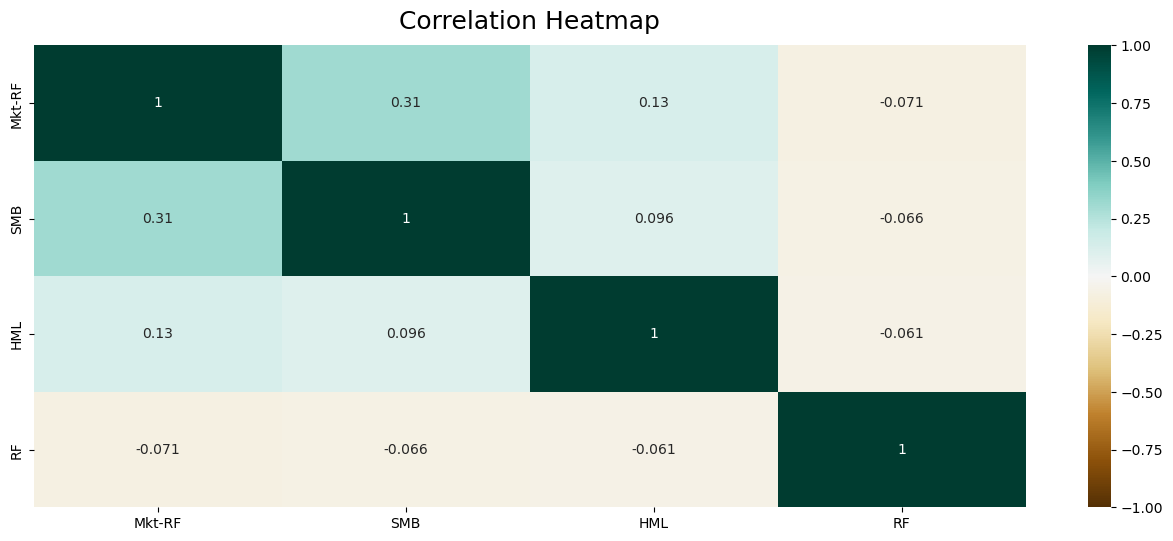

In [10]:
print('2002 to end')
correlation_heatmap(df[df['Date']>='2002'])

In [11]:
df_cumulative=df.copy()
df_cumulative.iloc[:,1:] = df_cumulative.iloc[:,1:]+1
df_cumulative.iloc[:,1:] = df_cumulative.iloc[:,1:].apply(np.log)
df_cumulative.iloc[:,1:] = df_cumulative.iloc[:,1:].cumsum()
df_cumulative.iloc[:,1:] = df_cumulative.iloc[:,1:].apply(np.exp)

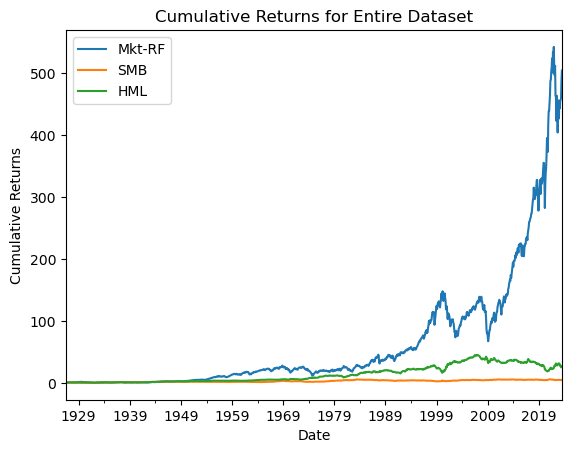

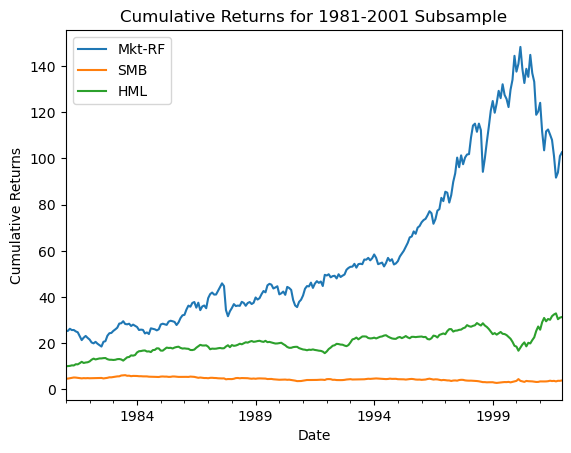

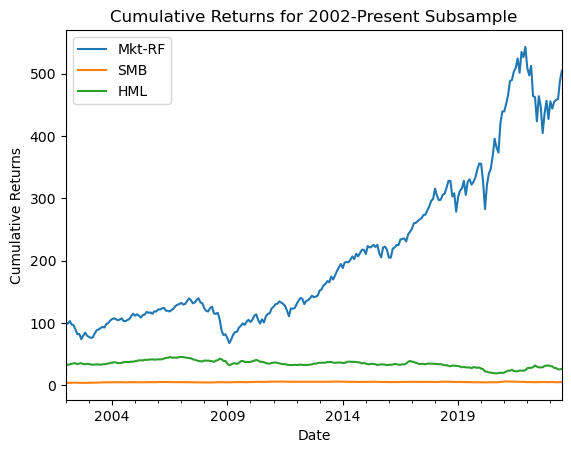

In [12]:
# plot cumulative returns for entire dataset
df_cumulative.plot(x='Date', y=['Mkt-RF', 'SMB', 'HML'])
plt.title('Cumulative Returns for Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# plot cumulative returns for 1981-2001 subsample
df_cumulative[(df_cumulative['Date']>='1981') & (df_cumulative['Date']<'2002')].plot(x='Date', y=['Mkt-RF', 'SMB', 'HML'])
plt.title('Cumulative Returns for 1981-2001 Subsample')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# plot cumulative returns for 2002-Present subsample
df_cumulative[df_cumulative['Date']>='2002'].plot(x='Date', y=['Mkt-RF', 'SMB', 'HML'])
plt.title('Cumulative Returns for 2002-Present Subsample')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


In [13]:
portfolios=pd.read_excel('../data/dfa_analysis_data.xlsx',sheet_name='portfolios (total returns)')
portfolios.iloc[:,1:] = portfolios.iloc[:,1:]-np.array(df['RF']).reshape(-1,1)
tportfolios=portfolios[portfolios['Date']>='1981'].copy()
portfolios=tportfolios

In [14]:
calculate_statistics(portfolios)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
mean,0.008607,0.091784,0.092669,0.117387,0.129434,0.059889,0.101862,0.107086,0.108899,0.116268,...,0.092653,0.095058,0.093819,0.101403,0.108079,0.091617,0.083851,0.080547,0.066909,0.096701
volatility,0.272345,0.235469,0.197721,0.192216,0.208092,0.244552,0.203997,0.184614,0.180524,0.213631,...,0.203128,0.177493,0.174715,0.175215,0.198628,0.164258,0.154577,0.153402,0.171895,0.206105
sharpe,0.031603,0.389793,0.468686,0.610703,0.622006,0.244894,0.499331,0.580052,0.603239,0.544248,...,0.456132,0.535559,0.536985,0.578736,0.544127,0.557761,0.542456,0.525072,0.389244,0.469185
skewness,0.081139,0.236356,-0.448782,-0.475542,-0.044491,-0.364003,-0.608055,-0.740516,-0.745941,-0.820377,...,-0.273613,-0.734793,-0.762450,-0.865615,-0.882500,-0.393276,-0.561539,-0.598256,-0.851639,-0.447691
kurtosis,2.432741,4.261314,2.503300,3.885449,6.460397,1.571536,2.729314,2.860216,2.739140,3.676710,...,1.966929,3.336560,3.218232,4.841489,3.923163,1.126348,2.145456,2.237114,3.733398,2.231596
VaR,-0.121077,-0.095709,-0.085817,-0.076442,-0.088647,-0.103985,-0.084928,-0.079119,-0.077423,-0.096701,...,-0.084034,-0.074252,-0.075706,-0.069432,-0.083626,-0.075800,-0.065342,-0.070516,-0.076139,-0.096376
CVaR,-0.172367,-0.144483,-0.123777,-0.122268,-0.132803,-0.155450,-0.128587,-0.122334,-0.121312,-0.147144,...,-0.125866,-0.115106,-0.117014,-0.114788,-0.139663,-0.100404,-0.099661,-0.099079,-0.122857,-0.138262


In [15]:
calculate_market_statistics(portfolios, df['Mkt-RF'][df['Date']>='1981'],12)

,alpha,market_beta,treynor_ratio,information_ratio
SMALL LoBM,-0.101810,1.350120,0.006375,-0.589896
ME1 BM2,-0.003112,1.160335,0.079101,-0.020671
ME1 BM3,0.008102,1.034045,0.089618,0.070898
ME1 BM4,0.038280,0.967278,0.121358,0.321632
SMALL HiBM,0.048608,0.988304,0.130966,0.347917
ME2 BM1,-0.049163,1.333429,0.044914,-0.382595
ME2 BM2,0.009541,1.128858,0.090235,0.092728
ME2 BM3,0.023275,1.024793,0.104495,0.252293
ME2 BM4,0.029536,0.970403,0.112220,0.300523
ME2 BM5,0.025540,1.109383,0.104805,0.204016


Treynor ratio would be constant (slope of market line), alphas would be zero, information ratio would be zero

In [16]:
mean_returns=calculate_statistics(portfolios).loc['mean']
market_betas=calculate_market_statistics(portfolios, df['Mkt-RF'][df['Date']>='1981'],12).market_beta
model=LinearRegression()
model.fit(market_betas.values.reshape(-1,1),mean_returns.values.reshape(-1,1))
R2=r2_score(mean_returns.values.reshape(-1,1),model.predict(market_betas.values.reshape(-1,1)))
Intercept=model.intercept_[0]
Regression_Coefficient=model.coef_[0][0]
print('The R^2 is',R2)
print('The intercept is',Intercept)
print('The regression coefficient is',Regression_Coefficient)

The R^2 is 0.27283286494916015
The intercept is 0.20383197986146517
The regression coefficient is -0.10387402411460309


Fama-French

In [17]:
ttdf=run_regression(portfolios, df[['Mkt-RF','SMB','HML']][df['Date']>='1981'])

X = df[['Mkt-RF', 'SMB', 'HML']][df['Date'] >= '1981']

tdf = pd.DataFrame(index=portfolios.columns[1:], columns=['information_ratio', 'treynor'])

# iterate over each column in portfolios and train a separate linear regression model for each column
for col in portfolios.columns[1:]:
    y = portfolios[col][portfolios['Date'] >= '1981']
    model = LinearRegression()
    model.fit(X, y)
    alpha = model.intercept_*12
    beta = model.coef_[0]
    y_pred = model.predict(X)
    residual = y - y_pred
    information_ratio = alpha / (residual.std()*np.sqrt(12))
    treynor = mean_returns.loc[col] / beta
    tdf.loc[col] = [information_ratio, treynor]


In [18]:
tmerged_df = pd.concat([tdf, ttdf], axis=1)
tmerged_df


,information_ratio,treynor,alpha,beta_Mkt-RF,beta_SMB,beta_HML
SMALL LoBM,-0.946733,0.007755,-0.085940,1.109864,1.382822,-0.257933
ME1 BM2,0.032343,0.095185,0.002293,0.964265,1.316603,-0.015634
ME1 BM3,0.011601,0.10097,0.000546,0.917788,1.048864,0.268570
ME1 BM4,0.465496,0.133589,0.022147,0.878718,1.057622,0.472523
SMALL HiBM,0.312548,0.139149,0.023260,0.930187,1.061953,0.691210
ME2 BM1,-0.535355,0.05259,-0.032166,1.138805,1.016961,-0.315877
ME2 BM2,0.159761,0.100705,0.008048,1.011494,0.905911,0.112696
ME2 BM3,0.180882,0.109837,0.009439,0.974947,0.713799,0.388736
ME2 BM4,0.178753,0.115525,0.008081,0.942648,0.740196,0.571512
ME2 BM5,-0.131075,0.10656,-0.006114,1.091105,0.924225,0.828847


In [19]:
model=LinearRegression()
model.fit(tmerged_df[['beta_Mkt-RF','beta_SMB','beta_HML']],mean_returns.values.reshape(-1,1))
R2=r2_score(mean_returns.values.reshape(-1,1),model.predict(tmerged_df[['beta_Mkt-RF','beta_SMB','beta_HML']]))
Intercept=model.intercept_[0]
Regression_Coefficient=model.coef_[0][0]
print('The R^2 is',R2)
print('The intercept is',Intercept)
print('The regression coefficient is',Regression_Coefficient)

The R^2 is 0.44708894394532195
The intercept is 0.18823432464299672
The regression coefficient is -0.10264150638813924


Tangency Portfolio

In [20]:
returns_tangency=np.array(portfolios.iloc[:,1:]@tangency_portfolio(portfolios))
calculate_market_statistics(portfolios, returns_tangency,12)


,alpha,market_beta,treynor_ratio,information_ratio
SMALL LoBM,2.410832e-15,0.021492,0.400459,8.853373e-15
ME1 BM2,2.206568e-15,0.229197,0.400459,9.578780e-15
ME1 BM3,1.800643e-15,0.231408,0.400459,9.403412e-15
ME1 BM4,2.040035e-15,0.293131,0.400459,1.122082e-14
SMALL HiBM,1.873501e-15,0.323215,0.400459,9.539663e-15
ME2 BM1,2.081668e-15,0.149552,0.400459,8.585205e-15
ME2 BM2,7.702172e-16,0.254364,0.400459,3.916060e-15
ME2 BM3,2.248202e-15,0.267407,0.400459,1.280145e-14
ME2 BM4,2.227385e-15,0.271936,0.400459,1.302616e-14
ME2 BM5,1.686151e-15,0.290338,0.400459,8.245318e-15


In [21]:
market_betas_tan=calculate_market_statistics(portfolios, returns_tangency).market_beta
model=LinearRegression()
model.fit(market_betas_tan.values.reshape(-1,1),mean_returns.values.reshape(-1,1))
R2=r2_score(mean_returns.values.reshape(-1,1),model.predict(market_betas_tan.values.reshape(-1,1)))
Intercept=model.intercept_[0]
Regression_Coefficient=model.coef_[0][0]
print('The R^2 is',R2)
print('The intercept is',Intercept)
print('The regression coefficient is',Regression_Coefficient)

The R^2 is 1.0
The intercept is 1.915134717478395e-15
The regression coefficient is 0.40045879018370223


Back to CAPM

In [22]:
print('Mean Absolute Error')
np.mean(np.abs(calculate_market_statistics(portfolios, df['Mkt-RF'][df['Date']>='1981']).alpha))

Mean Absolute Error


0.023373153692180595

In [23]:
T=portfolios.shape[0]
par=(1+((calculate_statistics(df[df['Date']>='1981']).loc['sharpe','Mkt-RF'])**2))**(-1)
ta=(calculate_market_statistics(portfolios, df['Mkt-RF'][df['Date']>='1981'])).alpha
residuals=pd.DataFrame()
for col in portfolios.columns[1:]:
    y = portfolios[col][portfolios['Date'] >= '1981']
    model = LinearRegression()
    model.fit(np.array(df[df['Date']>='1981'].loc[:,'Mkt-RF']).reshape(-1,1), y)
    y_pred = model.predict(np.array(df[df['Date']>='1981'].loc[:,'Mkt-RF']).reshape(-1,1))
    residual = y - y_pred
    residuals[col]=residual

cov_matrix = residuals.cov()
inv_cov_matrix = np.linalg.inv(cov_matrix)

statistic=T*par*(ta.T@inv_cov_matrix@ta)
print(statistic)

16085.59441116631


In [24]:
from scipy.stats import chi2

val = statistic # replace with the desired value
degrees = len(portfolios.columns[1:]) # degrees of freedom
p = chi2.cdf(val, degrees)

print('The p-value is',1-p)


The p-value is 0.0
